In [6]:
import pandas as pd

cell_df = pd.read_csv("cell_samples.csv")

# İlk 5 kaydı göster
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


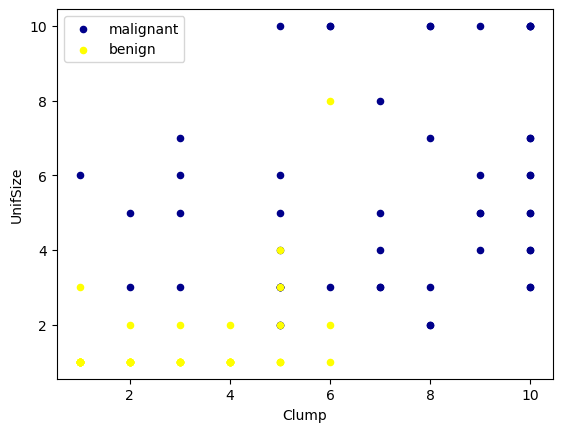

In [32]:
import matplotlib.pyplot as plt

# 'Class' değeri 4 olan (malignant) hücrelerin ilk 50 kaydını seçip, 'Clump' ve 'UnifSize' kolonlarını kullanarak bir scatter plot oluştur.
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');

# 'Class' değeri 2 olan (benign) hücrelerin ilk 50 kaydını seçip aynı scatter plot üzerinde, 'Clump' ve 'UnifSize' kolonlarını kullanarak çizecek.
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);

# Grafiği ekrana göstermek için plt.show() fonksiyonunu çağır.
plt.show()

In [9]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [10]:
# 'BareNuc' sütunundaki verileri sayısal değerlere dönüştürmeye çalışır. 
# Dönüştürülemeyen değerleri NaN (null) yapar.
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]

# 'BareNuc' sütununu tam sayıya (integer) dönüştürür.
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')

# Veri çerçevesindeki tüm sütunların veri türlerini gösterir.
cell_df.dtypes


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [12]:
import numpy as np

# 'cell_df' veri çerçevesinden belirli sütunları seçip 'feature_df' adlı yeni bir veri çerçevesi oluşturur.
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

# 'feature_df' veri çerçevesini NumPy dizisine dönüştürür.
X = np.asarray(feature_df)

# 'X' dizisinin ilk 5 satırını gösterir.
X[0:5]


array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [13]:
# 'Class' sütununu tam sayıya (integer) dönüştürür.
cell_df['Class'] = cell_df['Class'].astype('int')

# 'Class' sütununu NumPy dizisine dönüştürür.
y = np.asarray(cell_df['Class'])

# 'y' dizisinin ilk 5 satırını gösterir.
y[0:5]


array([2, 2, 2, 2, 2])

In [33]:
from sklearn.model_selection import train_test_split

# Veri kümesini eğitim (train) ve test setlerine ayırır.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Eğitim setinin ve test setinin boyutlarını yazdırır.
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


In [16]:
from sklearn import svm

# RBF (Radial Basis Function) çekirdek fonksiyonu kullanan bir SVM modeli oluşturur.
clf = svm.SVC(kernel='rbf')

# Modeli eğitim verileri ile eğitir.
clf.fit(X_train, y_train)

SVC()

In [17]:
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 4, 2, 4, 2])

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


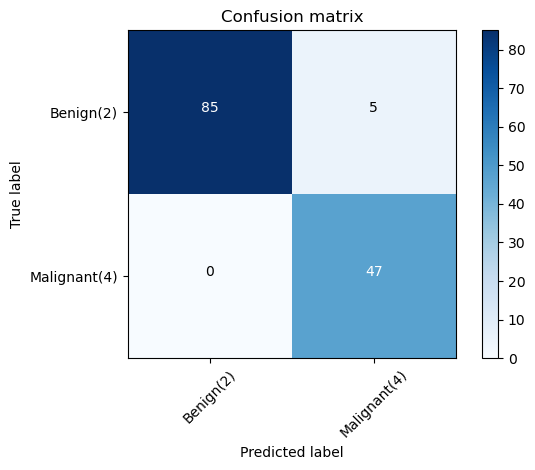

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    threshold = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')
 


In [24]:
from sklearn.metrics import f1_score

# Test seti üzerindeki tahminler ile gerçek etiketler arasındaki F1 skorunu hesaplar.
f1_score(y_test, yhat, average='weighted')



0.9639038982104676

In [25]:
from sklearn.metrics import jaccard_score

# Test seti üzerindeki tahminler ile gerçek etiketler arasındaki Jaccard skorunu hesaplar.
jaccard_score(y_test, yhat, pos_label=2)


0.9444444444444444

In [26]:
# Lineer çekirdek fonksiyonu kullanan SVM modeli oluşturur.
clf2 = svm.SVC(kernel='linear')

# Modeli eğitim verileri ile eğitir.
clf2.fit(X_train, y_train)

# Test seti üzerindeki tahminleri yapar.
yhat2 = clf2.predict(X_test)

# Ağırlıklı F1 skorunu hesaplar ve yazdırır.
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))

# Jaccard skorunu hesaplar ve yazdırır.
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2, pos_label=2))


Avg F1-score: 0.9639
Jaccard score: 0.9444
